In [1]:
import mglearn
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, MinMaxScaler

In [2]:
x, y = mglearn.datasets.make_wave(n_samples=100)

In [3]:
bins = np.linspace(-3, 3, 11)
which_bin = np.digitize(x, bins=bins)
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
x_binned = encoder.transform(which_bin)

In [4]:
x_combined = np.hstack([x, x_binned])

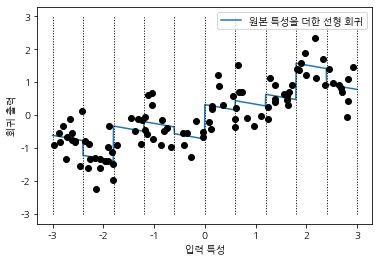

In [5]:
lr = LinearRegression().fit(x_combined, y)

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_binned = encoder.transform(np.digitize(line, bins=bins))

line_combined = np.hstack([line, line_binned])
plt.plot(line, lr.predict(line_combined), label='원본 특성을 더한 선형 회귀')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
plt.plot(x[:,0], y, 'o', c='k')
plt.xlabel('입력 특성')
plt.ylabel('회귀 출력')
plt.legend(loc='best')

In [6]:
x_product = np.hstack([x_binned, x*x_binned])
x_product.shape

(100, 20)

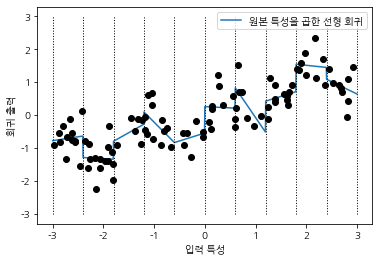

In [7]:
lr = LinearRegression().fit(x_product, y)

line_product = np.hstack([line_binned, line * line_binned])

plt.plot(line, lr.predict(line_product), label='원본 특성을 곱한 선형 회귀')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
plt.plot(x[:,0], y, 'o', c='k')
plt.xlabel('입력 특성')
plt.ylabel('회귀 출력')
plt.legend(loc='best')

In [8]:
# 고차항의 회귀 분석
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(x)
x_poly = poly.transform(x)

In [9]:
print('x 원소 : \n{}'.format(x[:5]))
print('x_poly 원소 : \n{}'.format(x_poly[:5]))

x 원소 : 
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
x_poly 원소 : 
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [10]:
print('항 이름 : \n{}'.format(poly.get_feature_names()))

항 이름 : 
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


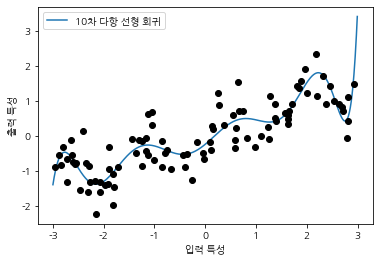

In [11]:
lr = LinearRegression().fit(x_poly, y)

line_poly = poly.transform(line)
plt.plot(line, lr.predict(line_poly), label='10차 다항 선형 회귀')
plt.plot(x[:, 0], y, 'o', c='k')
plt.xlabel('입력 특성')
plt.ylabel('출력 특성')
plt.legend(loc='best')

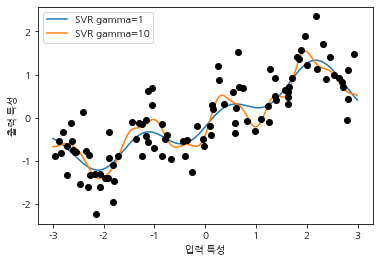

In [12]:
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(x, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(x[:, 0], y, 'o', c='k')
plt.xlabel('입력 특성')
plt.ylabel('출력 특성')
plt.legend(loc='best')

In [13]:
# 보스턴 데이터를 이용한 고차항 회귀 분석
boston = load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

In [14]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [15]:
poly = PolynomialFeatures(degree=2).fit(x_train_scaled)
x_train_poly = poly.transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)
print('x_train.shape : {}'.format(x_train.shape))
print('x_train_poly.shape : {}'.format(x_train_poly.shape))

x_train.shape : (379, 13)
x_train_poly.shape : (379, 105)


In [16]:
ridge = Ridge().fit(x_train_scaled, y_train)
print('상호작용 특성이 없을 때 점수 : {:.3f}'.format(ridge.score(x_test_scaled, y_test)))
ridge = Ridge().fit(x_train_poly, y_train)
print('상호작용 특성이 있을 때 점수 : {:.3f}'.format(ridge.score(x_test_poly, y_test)))

상호작용 특성이 없을 때 점수 : 0.621
상호작용 특성이 있을 때 점수 : 0.753


In [17]:
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(x_train_scaled, y_train)
print('상호작용 특성이 없을 때 점수 : {:.3f}'.format(rf.score(x_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(x_train_poly, y_train)
print('상호작용 특성이 있을 때 점수 : {:.3f}'.format(rf.score(x_test_poly, y_test)))

상호작용 특성이 없을 때 점수 : 0.795
상호작용 특성이 있을 때 점수 : 0.774
